<a href="https://colab.research.google.com/github/smithtarger/webmining/blob/main/200411100199_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# %cd /content/drive/MyDrive/prosaindata/

In [6]:
# !pip install nest-asyncio
# !git clone --depth=1 https://github.com/twintproject/twint.git
# %cd twint
# !pip3 install . -r requirements.txt

In [7]:
# !pip install aiohttp==3.7.0

In [8]:
# import nest_asyncio
# nest_asyncio.apply() #digunakan sekali untuk mengaktifkan tindakan serentak dalam notebook jupyter.
# import twint #untuk import twint
# c = twint.Config()
# c.Search = 'prabowo'
# c.Pandas = True
# c.Limit = 70
# twint.run.Search(c)
# Tweets_dfs = twint.storage.panda.Tweets_df
# Tweets_dfs["tweet"]

# **Mengambil Data**

Proses ini digunakan untuk data darigithub "dataset-baru" abstrak yang telah disimpan dalam github dengan format .csv



In [9]:
#install library pandas
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#install library numpy
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd 
import numpy as np

data_abstrak = pd.read_csv("https://raw.githubusercontent.com/smithtarger/webmining/main/dataset-baru.csv")

data_abstrak

,Unnamed: 0,Abstrak,Kategori
0,0,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,1,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,2,Web server adalah sebuah perangkat lunak serve...,RPL
3,3,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,4,Seiring perkembangan teknologi yang ada diduni...,RPL
...,...,...,...
800,804,Investasi saham selama ini memiliki resiko ker...,KOMPUTASI
801,805,Information Retrieval (IR) merupakan pengambil...,KOMPUTASI
802,806,Klasifikasi citra merupakan proses pengelompok...,KOMPUTASI
803,807,Identifikasi atribut pejalan kaki merupakan sa...,KOMPUTASI


In [12]:
#install library sastrawi
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 16.5 MB/s eta 0:00:00


In [13]:
#install library swifter
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=7fb3fb2bfc2afffc7e63a5ae1bdd3dccaa7a9f8e3f1562a23b67cd9d2a35eb59
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


# **Case Folding**

Tahap untuk merubah teks yang memiliki huruf kapital menjadi huruf kecil

In [14]:
data_abstrak['Abstrak'] = data_abstrak['Abstrak'].str.lower()


data_abstrak['Abstrak']

0      sistem  informasi  akademik  (siakad) merupaka...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan  kuliah  di  perguruan  tinggi  me...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval (ir) merupakan pengambil...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

In [15]:
#install library nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Menghapus Karakter Spesial

In [16]:
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_special)
data_abstrak['Abstrak']



0      sistem informasi akademik (siakad) merupakan s...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan kuliah di perguruan tinggi merupak...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval (ir) merupakan pengambil...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

## Menghapus Angka


In [17]:

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_number)
data_abstrak['Abstrak']

0      sistem informasi akademik (siakad) merupakan s...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan kuliah di perguruan tinggi merupak...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval (ir) merupakan pengambil...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

## Menghapus Tanda Baca


In [18]:

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_punctuation)
data_abstrak['Abstrak']

0      sistem informasi akademik siakad merupakan sis...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan kuliah di perguruan tinggi merupak...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval ir merupakan pengambilan...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

## Menghapus Spasi


In [19]:

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_whitespace_LT)


#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_whitespace_multiple)
data_abstrak['Abstrak']

0      sistem informasi akademik siakad merupakan sis...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan kuliah di perguruan tinggi merupak...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval ir merupakan pengambilan...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

## Menghapus char Huruf 


In [20]:

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(remove_singl_char)
data_abstrak['Abstrak']

0      sistem informasi akademik siakad merupakan sis...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan kuliah di perguruan tinggi merupak...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
800    investasi saham selama ini memiliki resiko ker...
801    information retrieval ir merupakan pengambilan...
802    klasifikasi citra merupakan proses pengelompok...
803    identifikasi atribut pejalan kaki merupakan sa...
804    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 805, dtype: object

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Tokenizing**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token

In [22]:

# NLTK word Tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(word_tokenize_wrapper)
data_abstrak['Abstrak']

0      [sistem, informasi, akademik, siakad, merupaka...
1      [berjalannya, koneksi, jaringan, komputer, den...
2      [web, server, adalah, sebuah, perangkat, lunak...
3      [penjadwalan, kuliah, di, perguruan, tinggi, m...
4      [seiring, perkembangan, teknologi, yang, ada, ...
                             ...                        
800    [investasi, saham, selama, ini, memiliki, resi...
801    [information, retrieval, ir, merupakan, pengam...
802    [klasifikasi, citra, merupakan, proses, pengel...
803    [identifikasi, atribut, pejalan, kaki, merupak...
804    [topik, deteksi, objek, telah, menarik, perhat...
Name: Abstrak, Length: 805, dtype: object

# **Filtering(Stopwords Removal)**
Proses untuk menghapus kata hubung atau kata yang tidak memiliki makna


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
list_stopwords = stopwords.words('indonesian')

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].apply(stopwords_removal)

data_abstrak['Abstrak']

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [berjalannya, koneksi, jaringan, komputer, lan...
2      [web, server, perangkat, lunak, server, berfun...
3      [penjadwalan, kuliah, perguruan, kompleks, per...
4      [seiring, perkembangan, teknologi, didunia, mu...
                             ...                        
800    [investasi, saham, memiliki, resiko, kerugian,...
801    [information, retrieval, ir, pengambilan, info...
802    [klasifikasi, citra, proses, pengelompokan, pi...
803    [identifikasi, atribut, pejalan, kaki, salah, ...
804    [topik, deteksi, objek, menarik, perhatian, pe...
Name: Abstrak, Length: 805, dtype: object

# **Stemming**
Data training hasil dari filtering akan dilakukan pengecekan atau pencarian kata-kata yang sesuai dengan kamus umum. Apabila data training hasil filtering sesuai dengan kamus umum maka kata akan dikeluarkan sementara, karena sudah dianggap sebagai kata dasar. Apabila masih terdapat kata yang tidak termasuk dalam kata dasar maka tahap selanjutnya adalah menghapus inflection suffixes yang merupakan akhiran pertama. Kata yang memiliki akhiran partticles seperti “-pun”, “-kah”, “-tah”, “- lah” dan akhiran possessive pronoun seperti “-mu”, “-ku” dan “-nya” dihilangkan. Setelah dilakukan proses case folding, tokenezing, dan filtering, proses selanjutnya yaitu stemming. Stemming yang digunakan pada penelitian ini menggunakan algoritma Enhanced Confix Stipping Stemmer, terdiri dari beberapa langkah: Data training hasil dari filtering akan dilakukan pengecekan atau pencarian kata-kata yang sesuai dengan kamus umum. Apabila data training hasil filtering sesuai dengan kamus umum maka kata akan dikeluarkan sementara, karena sudah dianggap sebagai kata dasar. Apabila masih terdapat kata yang tidak termasuk dalam kata dasar maka tahap selanjutnya adalah menghapus inflection suffixes yang merupakan akhiran pertama. Kata yang memiliki akhiran partticles seperti “-pun”, “-kah”, “-tah”, “- lah” dan akhiran possessive pronoun seperti “-mu”, “-ku” dan “-nya” dihilangkan.

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_abstrak['Abstrak']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")


8600
------------------------


In [26]:

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_abstrak['Abstrak'] = data_abstrak['Abstrak'].swifter.apply(get_stemmed_term)
data_abstrak['Abstrak']

Streaming output truncated to the last 5000 lines.
nem : nem
fisika : fisika
kimia : kimia
geografi : geografi
sosiologi : sosiologi
ppkn : ppkn
agama : agama
conversation : conversation
penjaskes : penjaskes
memetakkan : petak
intensif : intensif
advanced : advanced
smk : smk
satuan : satu
keahlian : ahli
dipadukan : padu
constraint : constraint
satisfaction : satisfaction
problem : problem
kromosom : kromosom
reproduksi : reproduksi
pc : pc
pm : pm
bottomhat : bottomhat
dilasi : dilasi
opening : opening
pembuluh : buluh
retina : retina
fundus : fundus
rgb : rgb
green : green
channel : channel
saturasi : saturasi
contrast : contrast
limited : limited
clahe : clahe
kontras : kontras
dgaussian : dgaussian
memperjelas : jelas
binerisasi : biner
median : median
retinal : retinal
for : for
vessel : vessel
drive : drive
blog : blog
penyumbang : sumbang
notabene : notabene
blogger : blogger
lurus : lurus
pemilahan : pilah
menjelajahi : jajah
expression : expression
daftar : daftar
niche : ni

Pandas Apply:   0%|          | 0/805 [00:00<?, ?it/s]

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [jalan, koneksi, jaring, komputer, lancar, gan...
2      [web, server, perangkat, lunak, server, fungsi...
3      [jadwal, kuliah, guru, kompleks, masalah, vari...
4      [iring, kembang, teknologi, dunia, muncul, tek...
                             ...                        
800    [investasi, saham, milik, resiko, rugi, gera, ...
801    [information, retrieval, ir, ambil, informasi,...
802    [klasifikasi, citra, proses, kelompok, piksel,...
803    [identifikasi, atribut, pejal, kaki, salah, te...
804    [topik, deteksi, objek, tarik, perhati, kemban...
Name: Abstrak, Length: 805, dtype: object

##Menyimpan Hasil Tahap Preprocessing ke file .csv

In [27]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

In [28]:
data_abstrak.to_csv("preprocessing.csv")

# **TF-IDF**

TF(Term Frequency) : Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('preprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['Abstrak'])
dataTextPre

,Unnamed: 0.1,Unnamed: 0,Abstrak,Kategori
0,0,0,"['sistem', 'informasi', 'akademik', 'siakad', ...",RPL
1,1,1,"['jalan', 'koneksi', 'jaring', 'komputer', 'la...",RPL
2,2,2,"['web', 'server', 'perangkat', 'lunak', 'serve...",RPL
3,3,3,"['jadwal', 'kuliah', 'guru', 'kompleks', 'masa...",KOMPUTASI
4,4,4,"['iring', 'kembang', 'teknologi', 'dunia', 'mu...",RPL
...,...,...,...,...
800,800,804,"['investasi', 'saham', 'milik', 'resiko', 'rug...",KOMPUTASI
801,801,805,"['information', 'retrieval', 'ir', 'ambil', 'i...",KOMPUTASI
802,802,806,"['klasifikasi', 'citra', 'proses', 'kelompok',...",KOMPUTASI
803,803,807,"['identifikasi', 'atribut', 'pejal', 'kaki', '...",KOMPUTASI


In [30]:
matrik_vsm=bag.toarray()
print(matrik_vsm)
matrik_vsm.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(805, 6515)

In [31]:
matrik_vsm[0]

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
a=vectorizer.get_feature_names_out()

In [33]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

805


,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
DataTFIDF = TfidfVectorizer()
TFIDF = DataTFIDF.fit_transform(dataTextPre['Abstrak']).toarray()
TFIDF = pd.DataFrame(TFIDF)
TFIDF

,0,1,2,3,4,5,6,7,8,9,...,6505,6506,6507,6508,6509,6510,6511,6512,6513,6514
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **PERCOBAAN K-MEANS


In [63]:
import numpy as np
from sklearn.cluster import KMeans

# Generate some sample data
X = np.random.rand(100, 2)

# Create a KMeans clustering model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# Print the cluster labels
print(labels)

[0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0]


In [66]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_

data=pd.DataFrame(prediksi,columns=["Cluster"])
data


,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
800,1
801,1
802,0
803,1


In [65]:
datalabel = pd.read_csv('https://raw.githubusercontent.com/smithtarger/webmining/main/dataset-baru.csv')
dataJurnal = pd.concat([dataTF.reset_index(drop=True), datalabel["Kategori"]], axis=1)
dataJurnal

,"(aalysis,)","(aam,)","(ab,)","(abad,)","(abadi,)","(abai,)","(abdi,)","(ability,)","(abjad,)","(absah,)",...,"(zat,)","(zcz,)","(zf,)","(zona,)","(zone,)","(zoning,)","(zoom,)","(zucara,)","(zungu,)",Kategori
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KOMPUTASI
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KOMPUTASI
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KOMPUTASI
802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KOMPUTASI
803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KOMPUTASI


In [60]:
dataJurnal['Kategori'].unique()

array(['RPL', 'KOMPUTASI'], dtype=object)

In [38]:
dataJurnal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Columns: 6516 entries, ('aalysis',) to Kategori
dtypes: int64(6515), object(1)
memory usage: 40.0+ MB


### Split Data

In [47]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataJurnal.drop(labels=['Kategori'], axis=1),
    dataJurnal['Kategori'],
    test_size=0.3,
    random_state=0)

In [40]:
X_train

,"(aalysis,)","(aam,)","(ab,)","(abad,)","(abadi,)","(abai,)","(abdi,)","(ability,)","(abjad,)","(absah,)",...,"(zara,)","(zat,)","(zcz,)","(zf,)","(zona,)","(zone,)","(zoning,)","(zoom,)","(zucara,)","(zungu,)"
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ** PERCOBAAN KNN 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
testing=[]
listnum=[]
for i in range(2,21):
  listnum.append(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  Y_pred = neigh.predict(X_test) 
  testing.append(Y_pred)
testing

[array(['KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
        'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
        'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
 

In [42]:
y_test

8      KOMPUTASI
258          RPL
172    KOMPUTASI
317    KOMPUTASI
294    KOMPUTASI
         ...    
774    KOMPUTASI
144    KOMPUTASI
214    KOMPUTASI
717    KOMPUTASI
406    KOMPUTASI
Name: Kategori, Length: 242, dtype: object

**Hasil**

In [43]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
listtest=[]
listacc=[]
for i in range(len(testing)):
  accuracy_neigh=round(accuracy_score(y_test,testing[i])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  listappend=listnum[i]
  appendlist=listappend,accuracy_neigh
  listtest.append(appendlist)
  listacc.append(accuracy_neigh)
listtest

[(2, 73.55),
 (3, 73.97),
 (4, 72.31),
 (5, 79.75),
 (6, 77.69),
 (7, 82.64),
 (8, 79.75),
 (9, 83.88),
 (10, 81.82),
 (11, 82.23),
 (12, 81.82),
 (13, 81.82),
 (14, 83.06),
 (15, 83.06),
 (16, 83.88),
 (17, 84.3),
 (18, 83.47),
 (19, 83.47),
 (20, 82.64)]

Text(0, 0.5, 'Persentase Akurasi')

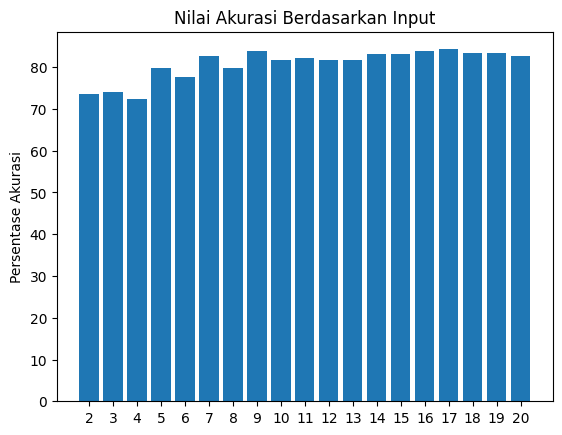

In [44]:
from matplotlib import pyplot as plt
plt.bar(listnum, listacc)
plt.xticks(listnum)
plt.title('Nilai Akurasi Berdasarkan Input')
plt.ylabel('Persentase Akurasi')